# Preliminares Matemáticos del Algoritmo de Maximización de la Esperanza

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3d/EM_Process.jpg" width="500px" height="300px" />

> En esta serie de cuadernos estaremos estudiando el algoritmo de maximización de la esperanza que introdujimos en la clase pasada en el contexto de mezclas Gaussianas.

> Este interesante algoritmo sirve para entrenar los parámetros de una gran mayoría de los modelos con variables latentes, incluido el modelo de mezclas Gaussianas.

> Sin embargo, para entenderlo es necesario tener claros varios conceptos matemáticos preliminares.

> **Objetivos:**
> - Explicar la desigualdad de Jensen para funciones cóncavas.
> - Comprender la divergencia de Kullback-Leibler como una medida de proximidad de distribuciones.
> - Probar propiedades sencillas relativas a la divergencia de Kullback-Leibler.

> **Referencias:**
> - Bayesian Methods for Machine Learning course, HSE University, Coursera.

## 1. Funciones cóncavas

> *Definición.* Sea $f:\Omega \subseteq \mathbb{R}^{k} \to \mathbb{R}$ una función real. Decimos que $f$ es cóncava si para todo $x_1, x_2 \in \Omega$ y $\alpha \in (0, 1)$
>
> $$
  f(\alpha x_1 + (1 - \alpha) x_2) \geq \alpha f(x_1) + (1 - \alpha) f(x_2).
  $$
  
  
La definición anterior lo que dice es que una función es cóncava si para cualesquier par de puntos sobre la gráfica de la función $f$, la función supera al segmento de recta que une esos dos puntos.

Veámoslo a través de un ejemplo:

In [1]:
# Importamos librerías
import numpy as np
from matplotlib import pyplot as plt

In [17]:
# Definimos una función cóncava
def f(x):
    return x**0.5

In [18]:
# Vector de x
x = np.linspace(1, 100)

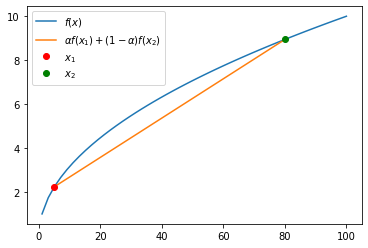

In [19]:
# Graficamos
alpha = np.linspace(0, 1)
x1 = 5
x2 = 80
plt.figure(figsize=(6, 4))
plt.plot(x, f(x), label="$f(x)$")
plt.plot(alpha * x1 + (1 - alpha) * x2, alpha * f(x1) + (1 - alpha) * f(x2),
         label=r"$\alpha f(x_1) + (1 - \alpha) f(x_2)$")
plt.plot(x1, f(x1), 'or', label="$x_1$")
plt.plot(x2, f(x2), 'og', label="$x_2$")
plt.legend()

**¿Qué ejemplos de funciones cóncavas se les vienen a la mente?**

- $f(x) = \log_a(x)$
- $f(x) = -\frac{1}{x}; \mathrm{Dom}[f]=\mathbb{R}_+$
- $f(x) = x^a; \mathrm{Dom}[f]=\mathbb{R}_+, \forall a \in (0, 1)$

Seguramente recordarán de cálculo un resultado para funciones dos veces diferenciables:

> *Teorema.* Sea $f: \mathbb{R} \to \mathbb{R}$ una función dos veces diferenciable en un intervalo abierto $(a, b)$. Entonces, $f$ es cóncava si y sólo si $f''(x) \leq 0$ para todo $x \in (a, b)$.

Usar el teorema para comprobar la concavidad de las funciones:

- $f(x) = \log_a(x)$
- $f(x) = -\frac{1}{x}; \mathrm{Dom}[f]=\mathbb{R}_+$
- $f(x) = x^a; \mathrm{Dom}[f]=\mathbb{R}_+, \forall a \in (0, 1)$

## 2. Desigualdad de Jensen

Ahora, la definición de concavidad sólo involucra un par de puntos. Sin embargo, es posible extender esto para cualquier cantidad de puntos:

> *Proposición.* Sea $f:\Omega \subseteq \mathbb{R}^{k} \to \mathbb{R}$ una función cóncava. Entonces para cualquier selección de números $\alpha_i \geq 0$, con $i = 1, \dots, m$, tales que $\sum_{i=1}^m \alpha_i = 1$ y cualquier selección de elementos $x_i \in \Omega$, con $i = 1, \dots, m$, se tiene que:
> 
> $$
  f\left(\sum_{i=1}^{m} \alpha_i x_i\right) \geq \sum_{i=1}^m \alpha_i f(x_i)
  $$

**¿La propiedad que deben cumplir las $\alpha_i$ se les hace conocida?**

- $\alpha_i \geq 0$, con $i = 1, \dots, m$
- $\sum_{i=1}^m \alpha_i = 1$

En términos probabilísticos, esto se podría escribir como:

> *Proposición.* Sea $f:\Omega \subseteq \mathbb{R}^{k} \to \mathbb{R}$ una función cóncava y $X$ una variable aleatoria (multivariable de dimensión $k$). Entonces
> 
> $$
  f(E[X]) \geq E[f(X)].
  $$

**Ejercicio.** Sea $X \sim \mathcal{N}(0, 1)$. Definimos la VA $Y$ como una función determinista de $X$, $Y=X^2 + 5$. ¿Cuál de las siguientes afirmaciones es cierta?

- La desigualdad de Jensen no se puede aplicar puesto que $\log (x^2 + 5)$ no es cóncava.
- $E[\log (x^2 + 5)] \geq \log E[x^2 + 5]$
- <font color=red>$E[\log (x^2 + 5)] \leq \log E[x^2 + 5]$ </font>
- $E[\log y] \geq \log E[y]$

## 3. Divergencia de Kullback-Leibler

Comúnmente, no solo en el contexto del algoritmo de maximización de la esperanza, necesitaremos medir la diferencia (o similaridad) entre dos distribuciones de probabilidad.

Una manera de medir esto es usando la **divergencia de Kullback-Leibler**.

**Ejemplo.** Supongamos que tenemos dos Gaussianas:

In [20]:
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np

In [21]:
X = norm(loc=0, scale=1)
Y = norm(loc=1, scale=1)

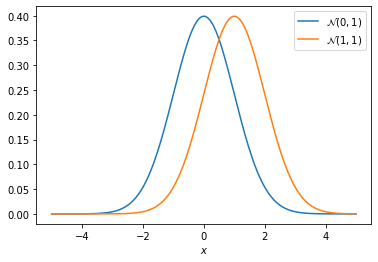

In [22]:
x = np.linspace(-5, 5, 1001)
plt.plot(x, X.pdf(x), label=r"$\mathcal{N}(0, 1)$")
plt.plot(x, Y.pdf(x), label=r"$\mathcal{N}(1, 1)$")
plt.xlabel("$x$")
plt.legend()

Una posible manera de medir la diferencia entre estas distribuciones sería medir la "distancia" entre los parámetros, la cual en este caso es 1.

Sin embargo este enfoque tiene dos problemas:

1. ¿Qué pasa si las distribuciones que quiero comparar son de distintas familias?

2. Aún cuando las distribuciones son de la misma familia, veamos el siguiente caso:

In [23]:
X = norm(loc=0, scale=10)
Y = norm(loc=1, scale=10)

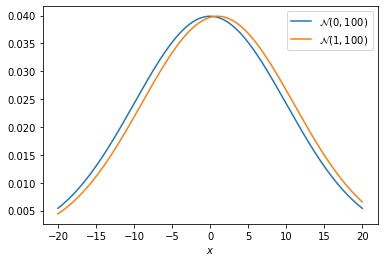

In [24]:
x = np.linspace(-20, 20, 1001)
plt.plot(x, X.pdf(x), label=r"$\mathcal{N}(0, 100)$")
plt.plot(x, Y.pdf(x), label=r"$\mathcal{N}(1, 100)$")
plt.xlabel("$x$")
plt.legend()

En este caso, aplicando el mismo principio, la distancia también sería 1. Sin embargo, podemos apreciar que estas distribuciones se parecen muchísimo más que las anteriores. Por esto deberíamos considerar una medida alternativa de similitud / diferencia entre distribuciones.

Esta medida es la **divergencia de Kullback-Leibler**.

> *Definición.* Dadas dos distribuciones de probabilidad, la divergencia de Kullback-Leibler se define como:
>
> $$
  \mathcal{KL}(q || p) = \int_{-\infty}^{\infty} q(x) \log \frac{q(x)}{p(x)} d x = E_{q(x)}\left[\log \frac{q(x)}{p(x)}\right]
  $$
>  
> si las variables son continuas, o
>
> $$
  \mathcal{KL}(q || p) = \sum_{x} q(x) \log \frac{q(x)}{p(x)} = E_{q(x)}\left[\log \frac{q(x)}{p(x)}\right]
  $$
>
> si las variables son discretas. 

Evaluemos:

In [25]:
from scipy.integrate import quad

In [36]:
# Primer conjunto de distribuciones
def q(x):
    return norm.pdf(x, 0, 1)
def p(x):
    return norm.pdf(x, 1, 1)
def caso1(x):
    return q(x) * np.log(q(x) / p(x))

In [37]:
kl1, _ = quad(caso1, -10, 10)
kl1

0.5000000000000001

In [40]:
# Segundo conjunto de distribuciones
def q(x):
    return norm.pdf(x, 0, 10)
def p(x):
    return norm.pdf(x, 1, 10)
def caso2(x):
    return q(x) * np.log(q(x) / p(x))

In [34]:
kl2, _ = quad(caso2, -100, 100)
kl2

0.005000000000000031

Observamos que si evaluamos la diferencia entre las distribuciones en el primer caso (más distintas) obtenemos un valor de divergencia de 0.5, mientras que para el segundo caso (más parecidas) obtenemos un valor de divergencia de 0.005.

### Propiedades de la divergencia de Kullback-Leibler

Tenemos las siguientes propiedades:

1. $\mathcal{KL}(q || p) \neq \mathcal{KL}(p || q)$.
2. $\mathcal{KL}(q || q) = 0$
3. $\mathcal{KL}(q || p) \geq 0$

*Prueba.* En clase ... (Considerar el negativo de la divergencia y usar la desigualdad de Jensen).

**Tarea (opcional - válida por una tarea anterior):**

Supongamos que $q(x)=\mathcal{N}(x | \mu_1, \sigma_1^2)$ y $p(x)=\mathcal{N}(x | \mu_2, \sigma_2^2)$.

Calcular:

1. $\mathcal{KL}(q || p)$.

2. $\mathcal{KL}(p || q)$.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>